<h1><div class="alert alert-block alert-info">
Linear Regression
</div></h1>

<h2>Framework</h2>
Y : is a numeric response variable<br>
X<sup>(1)</sup>,...,X<sup>(p)</sup> : <i>p</i> numeric explanatory variables (also called features)

<b><font color = "blue">If</font></b> we can assume that the relationship between Y and X is linear, like the one represented by the graphic below:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/220px-Linear_regression.svg.png">

<b><font color = "blue">Then: </font></b> we assume that we can represent it by a model:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/704b31aa61dfc93d672f15bf02aa6d168be49643">

Writing this equation in a <b><font color = "orange">matrix notation</font></b> we have:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8119b3ed1259aa8ff15166488548104b50a0f92e">

<i>Source: </i> Wikipedia

Where:<br>
${n}$ is the number of observations on the dataset<br>
${p}$ is the number of explanatory variables<br>
${y}$ is a vector of the response variable. This is a vector of ${n}$ rows.<br>
${X}$ is a matrix of the explanatory variables, where the columns represent the features and the lines represent the observations. We can also imagine it as a matrix of vectors, where each line ${(i)}$ is a vector of the features that explain the ${y_i}$. Considering that in a linear model we have an interception the first column is filled with ones, representing that this value is taken into account with factor 1 to explain the response variable.This is a matrix of ${n}$ rows and <b>{p+1}</b> columns.<br>
${β}$ is a vector of the coefficients of the model, this is what makes the model linear, because this values are fixed for all the observations. This is a vector of ${(p+1)}$ columns.<br>
${\boldsymbol {\varepsilon }}$ is the noise, and represents the values that cannot be captured simply by the linear model. This is a vector of ${n}$ rows<br>

<h2>Linear Model</h2>

In a linear model we try to define the parameters that will infer in the minimum error between the prediction of the model for all datapoints and the actual value presented on the dataset. One of the methods used for this is the least-squared criterion:

So we define an equation that is:

${S(β)=\sum_{i=1}^{n} (y_i-βX_i)^2 = \lVert{Y-βX}\rVert^2}$

${β}$ can assumes many values, but we are interest in the vector that will have the smallest error. So we are interested in ${\hatβ}$ that is the solution that minimizes the error:

${S(\hatβ)=min_{(β\in \mathbf{R}^{(p+1)})}\sum_{i=1}^{n} (y_i-βX_i)^2 = \lVert{Y-βX}\rVert^2}$

The solution for this minimization problem is:

${\hatβ=(^tXX)^{-1}(^tX)Y}$

<h3>Assumptions</h3>
<p><b><font color = "blue">Homoscedasticity: <font></b> by this we consider that the model has a constant variance throughout its domain. This concept is important because the linear regression model gives the same weight to all observations. 

<img src="https://miro.medium.com/max/3326/1*Jan9oVOzNqQyhA4bSg_zwA.png"></p>
<i>Source: </i> Assumptions Of Linear Regression Algorithm by Gomathi tamilselvam

<p><b><font color = "blue">Fixed design: <font></b> The points (or vectors) X1, . . . , Xn are deterministic, in other words they are not random variables. If you are not in a fixed design you need to treat X as a probabilistic model.
    
<p><b><font color = "blue">Independence of the noise: <font></b> It means that the errors of the response variable are uncorrelated with each other. 

<h2>Working on data</h2>

<div class="alert alert-secondary alert">
 <h3><font color = "blue">Scenario I: Gaussian noise $\mathcal{N}(0,1)$</font></h3>
</div>

<hr>
<h4>I.a) Building a Dataset </h4>

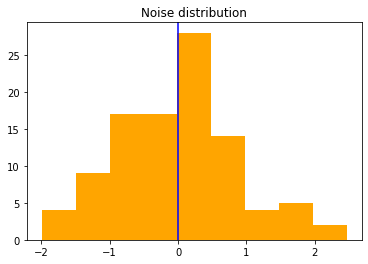

mean: -0.0010803601673571495
variance: 0.8251056127298473


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
noise = np.random.randn(100, 1)
plt.axvline(x=0, color = "blue")
plt.hist(x=noise, bins='auto', color='orange')
plt.title("Noise distribution")
plt.show()
print("mean: "+str(np.mean(noise)))
print("variance: " +str(np.var(noise)))


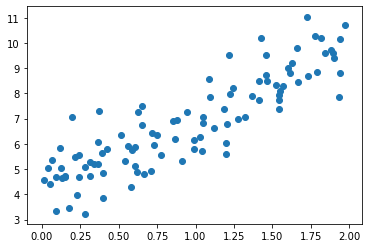

In [22]:
y = 4 + 3 * X + noise
plt.scatter(X,y)
plt.show()

<h4>I.b) Modeling </h4>
There are many ways to solve the minimization problem of the least-squared method:

<h5><b><font color = "orange">1) Using the normal equation</font></b></h5>
${\hatβ=(^tXX)^{-1}(^tX)Y}$

In [23]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_matrix = np.c_[np.ones((100, 1)), X]
tXX_inv=np.linalg.inv(np.dot(X_matrix.T,X_matrix))
beta_hat = np.dot(np.dot(tXX_inv,X_matrix.T),y)

X_matrix = np.c_[np.ones((100, 1)), X]
tXX_inv=np.linalg.inv(np.matmul(X_matrix.T,X_matrix))
beta_hat2 = np.matmul(np.matmul(tXX_inv,X_matrix.T),y)

df=pd.DataFrame({'Solution using':['Book sample', 'Equation with dot function', 'Equation with matmul function'], 
                    'Intercept':[theta_best[0], beta_hat[0], beta_hat2[0]], 
                    'Coefficient':[theta_best[1], beta_hat[1], beta_hat2[1]]})
df.style.hide_index()

Solution using,Intercept,Coefficient
Book sample,[4.21509616],[2.77011339]
Equation with dot function,[4.21509616],[2.77011339]
Equation with matmul function,[4.21509616],[2.77011339]


<i><font color = "blue">Remark: </font><i/>
The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), so we obtain the same result using directly using:

In [52]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd
pd.DataFrame(theta_best_svd, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.215096
coefficient,2.770113


<h5><b><font color = "orange">3. Using the pseudoinverse</font></b></h5>

This function computes $θ = X^+y$, where $X^+$ is the pseudoinverse of X (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [2]:
sol=np.linalg.pinv(X_b).dot(y)
pd.DataFrame(sol, ['intercept','coefficient'], columns=["Value"])

NameError: name 'X_b' is not defined

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U Σ VT$ (see
numpy.linalg.svd()). The pseudoinverse is computed as $X+ = VΣ+UT$. To the matrix $Σ+$, the algorithm takes $Σ$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $XTX$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

<h5><b><font color = "orange">4. Using linear algebra</font></b></h5>

We can understand that our problem is of type: $Ax=b$, applying this to our set we would rewrite it as:
$Xβ = y$
So we can look for the linear independent rows of matrix X, in order to reduce our number of rows to compute. The next step would be finding β that is:

$β = X^{-1}y$

In [54]:
q, r =np.linalg.qr(X_matrix) 
# If A = qr such that q is orthonormal (which is always possible via Gram-Schmidt) then x = inv(r) * (q.T) * b
#r - reduced: linearly independent rows
#q - matrix of orthonormal columns
p = np.dot(q.T, y)
sol_la=np.dot(np.linalg.inv(r), p)
pd.DataFrame(sol_la, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.215096
coefficient,2.770113


<b>Measuring the quality of the model</b>

In [24]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))


NameError: name 'model' is not defined

<h4>I.c) Predicting </h4>

In [55]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

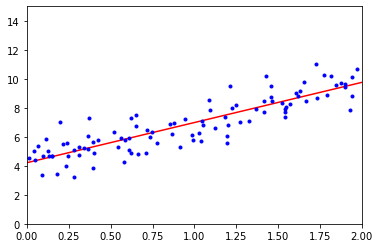

In [56]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [57]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [58]:
print("The value predicted for 1.5 is: ",model.predict([[1.5]]), "and the actual value is: ", 4 + 3 * 1.5)

The value predicted for 1.5 is:  [[8.37026624]] and the actual value is:  8.5


<hr>

<h3><font color = "blue">Scenario II: Gaussian noise  $\mathcal{N}(\mu=1,\sigma^2=2)$</font></h3>
<hr>

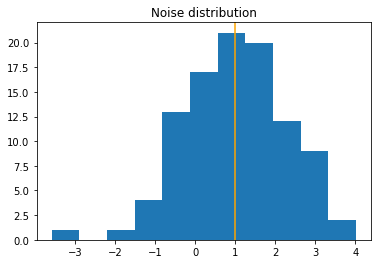

mean: 1.0170366148918693
variance: 1.6023307543478769


In [59]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
noise = np.random.normal(loc=1, scale=np.sqrt(2), size=100)
noise=np.reshape(noise,(100,1))
plt.axvline(x=1, color = "orange")
plt.hist(x=noise, bins='auto')
plt.title("Noise distribution")
plt.show()
print("mean: "+str(np.mean(noise)))
print("variance: " +str(np.var(noise)))

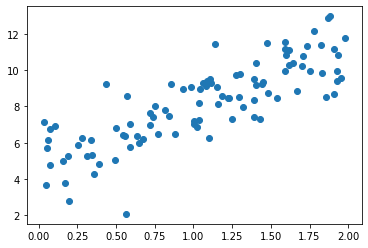

In [60]:
y = 4 + 3 * X + noise

plt.scatter(X, y)
plt.show()

<h5><b><font color = "orange">Solving the minimization problem:</font></b></h5>

In [61]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

pd.DataFrame(theta_best, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.809096
coefficient,3.196804


<i>The intercept and the coefficient are worse than the ones we found out, when we had a standard gaussian noise! </i> <font color ="red"> Considering that our noise has $\mu= 1$, it makes sense that the intercept value increases at least in this proportion.</font>

<b>Important: </b> When I have gaussian with miu <> 0 the noise is no more only a noise, because it is confused with information. 

<b>Measuring the quality of the model</b>

coefficient of determination: 0.4450581260993678


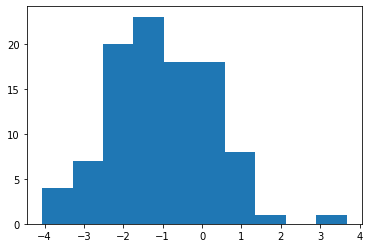

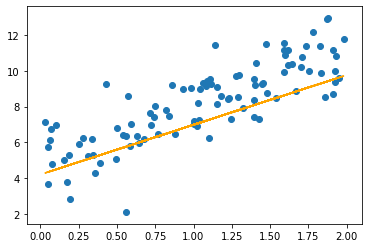

RMSE for simple linear regression:  1.655593739472336


In [62]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))

<b><font color="red">🚩Important:</font></b> In this scenario the assumption of the standard gaussian noise was not respected, so the quality of our estimator for intercept and for the coefficients decreased substantially, showing a great decrease on the coefficient of determination. And the mean squared error increases drastically.

<h4>I.c) Predicting </h4>

In [63]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.80909604],
       [11.20270501]])

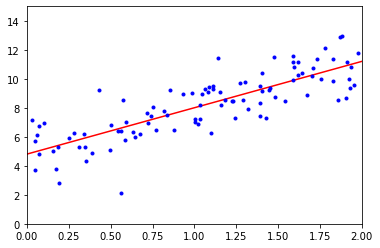

In [64]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [65]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [66]:
print("The value predicted for 1.5 is: ",model.predict([[1.5]]), "and the actual value is: ", 4 + 3 * 1.5)

The value predicted for 1.5 is:  [[8.37026624]] and the actual value is:  8.5


🤔 <font color ="blue"> What should we do to improve the results? </font>

<hr>********************************************************************************************************************************************************************<hr>

<h3><font color = "red">Scenario IV: Noise is dependent</font></h3>
<hr>

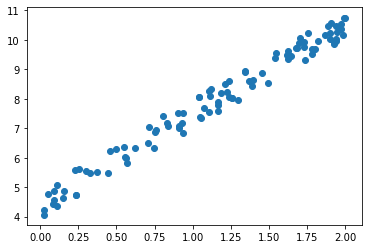

The noise that we added has the parameter 0 as intercept and coefficient 1


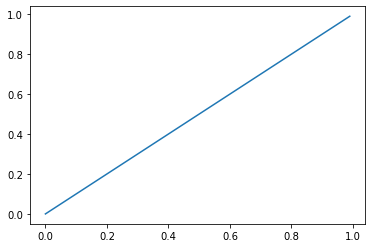

In [67]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
noise = np.arange(100)/100
noise=np.reshape(noise,(100,1))
y = 4 + 3 * X + noise
plt.scatter(X,y)
plt.show()

print("The noise that we added has the parameter 0 as intercept and coefficient 1")
plt.plot(noise,noise)
plt.show()

<h5><b><font color = "orange">Solving using Scikit-learn</font></b></h5>
Using the Linear Regression method from Scikit-learn

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model=lin_reg.fit(X, y)
pd.DataFrame([lin_reg.intercept_, lin_reg.coef_], ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.42498
coefficient,[3.061848986755193]


<font color = "red">The value that we obtained did not change the obtained did not impact on the slope, because we choose a 45 degree equation as noise, but as we have slope 1 and we are dealing with a normal distribution the y value increased in a proportion equivalent to approximately 50% of the slope. </font>

<b>Measuring the quality of the model</b>

coefficient of determination: 0.9770009135728909


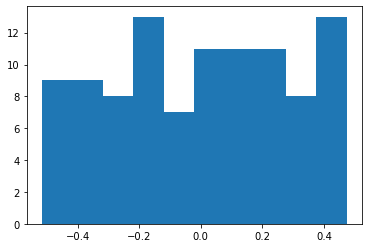

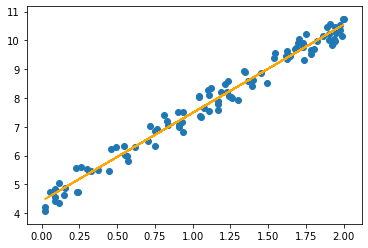

RMSE for simple linear regression:  0.2861910344300333


In [69]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error,bins=10)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))

In [70]:
print("The value predicted for 1.5 is: ",model.predict([[1.5]]), "and the actual value is: ", 4 + 3 * 1.5)

The value predicted for 1.5 is:  [[9.01775326]] and the actual value is:  8.5


<h3><font color = "orange">Scenario V: Heteroscedascity </font></h3>
<hr>
<h4>I.a) Building a Dataset </h4>

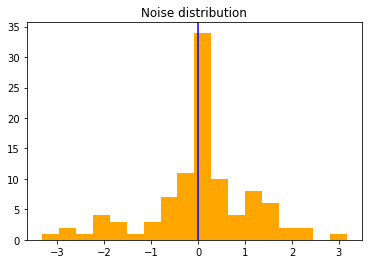

mean: 0.07000404669152256
variance: 1.2414425913343454


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = 2 * np.random.rand(100, 1)

sigma2 = X**1.7
sd_ = np.sqrt(sigma2)
noise = np.random.normal(loc=0, scale=sd_)
np.random.randn()
plt.axvline(x=0, color = "blue")
plt.hist(x=noise, bins='auto', color='orange')
plt.title("Noise distribution")
plt.show()
print("mean: "+str(np.mean(noise)))
print("variance: " +str(np.var(noise)))

<h5><b><font color = "orange">Solving the minimization problem:</font></b></h5>

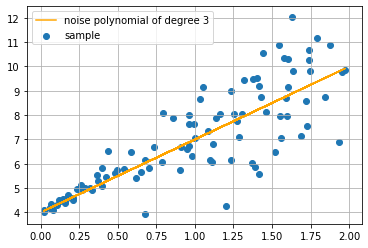

In [87]:
y = 4 + 3 * X + noise
plt.scatter(X,y, label = "sample")
plt.plot(X, 4 + 3 * X, color = 'orange', label = "noise polynomial of degree 3")
plt.grid()
plt.legend()
plt.show()

In [88]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

pd.DataFrame(theta_best, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.115114
coefficient,2.952151


<b>Measuring the quality of the model</b>

coefficient of determination: 0.6665100726166354


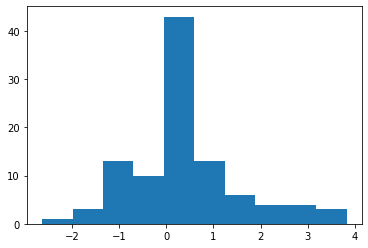

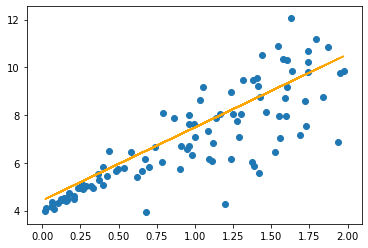

RMSE for simple linear regression:  1.1897920772576243


In [89]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))

<div class="alert alert-block alert-danger">
    <b>🚩 Important</b><br>
    <p>
    <i>In this scenario the assumption of homoscedascity was not respected, so we observe a decrease our coefficient of determination, and the mean squared error increases.  </i> <font color ="red"> </font></p>
</div

<h4>I.c) Predicting </h4>

In [90]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.11511386],
       [10.01941591]])

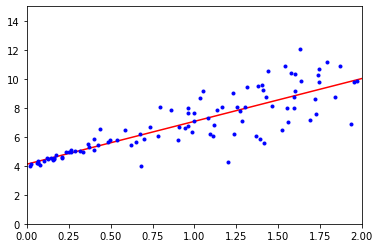

In [91]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [92]:
lin_reg.predict(X_new)

array([[ 4.42497978],
       [10.54867775]])

In [93]:
print("The value predicted for 1.5 is: ",model.predict([[1.5]]), "and the actual value is: ", 4 + 3 * 1.5)

The value predicted for 1.5 is:  [[9.01775326]] and the actual value is:  8.5


💡<b><font color='green'>Important:</font></b> When we have heteroscedascity we have some alternatives to deal with it:
    - Use some transformation on the data bringing it to a constant variance
    - Use log to transform the variable in order to reduce the effect of the variance that changes through time
    - Clusterize working on small intervals where the variance is constant

<div class="alert alert-secondary alert">
 <h3><font color = "blue">Scenario VI: Exponential noise $\mathcal{E}(0.5)$</font></h3>
</div>

<hr>
<h4>I.a) Building a Dataset </h4>

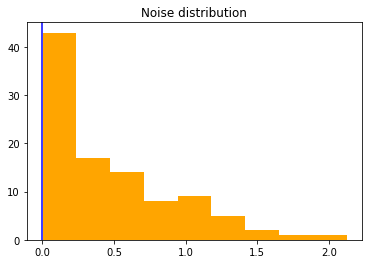

mean: 0.4881124577643136
variance: 0.20407661380282388


In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
noise = np.random.exponential(.5, 100).reshape(100,1)
plt.axvline(x=0, color = "blue")
plt.hist(x=noise, bins='auto', color='orange')
plt.title("Noise distribution")
plt.show()
print("mean: "+str(np.mean(noise)))
print("variance: " +str(np.var(noise)))

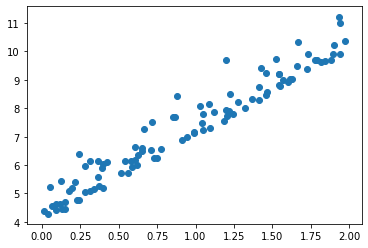

In [20]:
y = 4 + 3 * X + noise
plt.scatter(X,y)
plt.show()

<h4>I.b) Modeling </h4>
There are many ways to solve the minimization problem of the least-squared method:

<h5><b><font color = "orange">1) Using the normal equation</font></b></h5>
${\hatβ=(^tXX)^{-1}(^tX)Y}$

In [49]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_matrix = np.c_[np.ones((100, 1)), X]
tXX_inv=np.linalg.inv(np.dot(X_matrix.T,X_matrix))
beta_hat = np.dot(np.dot(tXX_inv,X_matrix.T),y)

X_matrix = np.c_[np.ones((100, 1)), X]
tXX_inv=np.linalg.inv(np.matmul(X_matrix.T,X_matrix))
beta_hat2 = np.matmul(np.matmul(tXX_inv,X_matrix.T),y)

df=pd.DataFrame({'Solution using':['Book sample', 'Equation with dot function', 'Equation with matmul function'], 
                    'Intercept':[theta_best[0], beta_hat[0], beta_hat2[0]], 
                    'Coefficient':[theta_best[1], beta_hat[1], beta_hat2[1]]})
df.style.hide_index()

Solution using,Intercept,Coefficient
Book sample,[4.21509616],[2.77011339]
Equation with dot function,[4.21509616],[2.77011339]
Equation with matmul function,[4.21509616],[2.77011339]


<h5><b><font color = "orange">2. Using Scikit-learn</font></b></h5>
Using the Linear Regression method from Scikit-learn

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model=lin_reg.fit(X, y)
pd.DataFrame([lin_reg.intercept_, lin_reg.coef_], ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.2151
coefficient,[2.7701133864384837]


<b>Measuring the quality of the model</b>

coefficient of determination: 0.7692735413614223


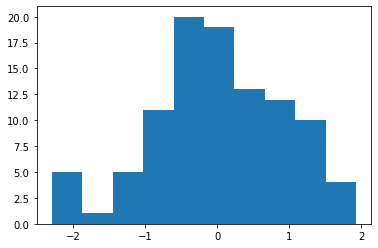

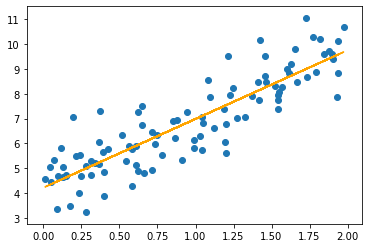

RMSE for simple linear regression:  0.8981005311027564


In [51]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))


<i><font color = "blue">Remark: </font><i/>
The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), so we obtain the same result using directly using:

In [52]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd
pd.DataFrame(theta_best_svd, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.215096
coefficient,2.770113


<h5><b><font color = "orange">3. Using the pseudoinverse</font></b></h5>

This function computes $θ = X^+y$, where $X^+$ is the pseudoinverse of X (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [2]:
sol=np.linalg.pinv(X_b).dot(y)
pd.DataFrame(sol, ['intercept','coefficient'], columns=["Value"])

NameError: name 'X_b' is not defined

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U Σ VT$ (see
numpy.linalg.svd()). The pseudoinverse is computed as $X+ = VΣ+UT$. To the matrix $Σ+$, the algorithm takes $Σ$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $XTX$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

<h5><b><font color = "orange">4. Using linear algebra</font></b></h5>

We can understand that our problem is of type: $Ax=b$, applying this to our set we would rewrite it as:
$Xβ = y$
So we can look for the linear independent rows of matrix X, in order to reduce our number of rows to compute. The next step would be finding β that is:

$β = X^{-1}y$

In [54]:
q, r =np.linalg.qr(X_matrix) 
# If A = qr such that q is orthonormal (which is always possible via Gram-Schmidt) then x = inv(r) * (q.T) * b
#r - reduced: linearly independent rows
#q - matrix of orthonormal columns
p = np.dot(q.T, y)
sol_la=np.dot(np.linalg.inv(r), p)
pd.DataFrame(sol_la, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.215096
coefficient,2.770113


<h4>I.c) Predicting </h4>

In [55]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

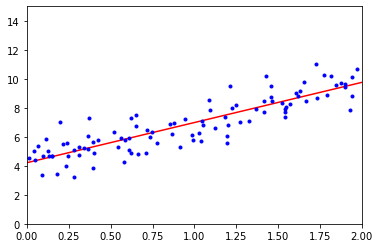

In [56]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [57]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [58]:
print("The value predicted for 1.5 is: ",model.predict([[1.5]]), "and the actual value is: ", 4 + 3 * 1.5)

The value predicted for 1.5 is:  [[8.37026624]] and the actual value is:  8.5
